# Marker genes description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
    'svg.fonttype': 'none',
    'font.sans-serif': 'Arial',
    'font.size': 12,
    'boxplot.medianprops.linewidth': 2,
    'boxplot.flierprops.markeredgecolor': 'none',
    'boxplot.flierprops.markersize': 5})

## KEGG

Load KEGG annotations

In [3]:
meta = {}
with open('./input_data/ko_name.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        meta[og] = description

In [4]:
pathway_name = {}
with open('./input_data/pathway_name.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        pathway_name[og] = description

In [5]:
pathways = {}
with open('./input_data/ko-to-pathway.map', 'r') as f:
    for line in f:
        key = line.strip().split('\t')[0]
        # Take only the first element
        val = line.strip().split('\t')[1:]
        pathways[key] = val

In [6]:
rclass = {}
with open('./input_data/pathway-to-class.map', 'r') as f:
    for line in f:
        key = line.strip().split('\t')[0]
        val = line.strip().split('\t')[1]
        rclass[key] = val

In [7]:
def annotate_genes(ogs, meta, pathways, pathway_name, rclass):

    data = {'OGs': [], 'Description': [], 'Pathways': [], 'rClasses': []}

    for og in ogs:
        if og in meta.keys():
            data['OGs'].append(og)
            data['Description'].append(meta[og])
            if og in pathways.keys():
                categories = [pathway_name[ptw] for ptw in pathways[og] if ptw in pathway_name.keys()]
                # rclasses = [rclass[ptw] else "Not Assigned" for ptw in pathways[og] if ptw in rclass.keys() and rclass[ptw] not in ['Organismal Systems', 'Human Diseases']]
                rclasses = []
                for ptw in pathways[og]:
                    if ptw in rclass.keys():
                        if rclass[ptw] not in ['Organismal Systems', 'Human Diseases']:
                            rclasses.append(rclass[ptw])
                        else:
                            rclasses.append('NA')
                data['Pathways'].append(categories)
                data['rClasses'].append(rclasses)
            else:
                print(f'{og} not in pathway')
                data['Pathways'].append('NA')
                data['rClasses'].append('NA')
        else:
            print(f'{og} not in meta')
            continue
                
    # Create data frame
    df = pd.DataFrame.from_dict(data)
    df.set_index(['OGs'], inplace = True)
    # df.sort_index(inplace = True)
    
    return df

In [8]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
dfs = []
for k in ks:
    genes = np.loadtxt(f'./output_data/wol2/marker_genes/kegg/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    dfs.append(annotate_genes(genes, meta, pathways, pathway_name, rclass))

K02600 not in pathway
K07497 not in pathway
K01409 not in pathway
K02600 not in pathway
K01265 not in pathway
K01409 not in pathway
K07497 not in pathway
K03424 not in pathway
K03979 not in pathway
K02469 not in pathway
K02503 not in pathway
K02518 not in pathway
K02519 not in pathway
K02520 not in pathway
K02528 not in pathway
K03424 not in pathway
K03438 not in pathway
K02600 not in pathway
K07483 not in pathway
K02004 not in pathway
K07497 not in pathway
K07566 not in pathway
K01265 not in pathway
K02838 not in pathway
K01409 not in pathway
K03687 not in pathway
K02355 not in pathway
K02357 not in pathway
K03977 not in pathway
K03979 not in pathway
K02469 not in pathway
K02470 not in pathway
K08316 not in pathway
K06173 not in pathway
K06180 not in pathway
K02503 not in pathway
K02518 not in pathway
K02519 not in pathway
K02520 not in pathway
K02528 not in pathway
K04075 not in pathway
K04078 not in pathway
K03424 not in pathway
K03438 not in pathway
K02600 not in pathway
K02601 not

Count the number of genes in category

In [9]:
tmp = dfs[6][dfs[6]['rClasses'] == 'NA']
for ko in tmp.index:
    print(ko, tmp.loc[ko]['Description'])

K08296 sixA; phosphohistidine phosphatase [EC:3.1.3.-]
K03282 mscL; large conductance mechanosensitive channel
K03284 corA; magnesium transporter
K08316 rsmD; 16S rRNA (guanine966-N2)-methyltransferase [EC:2.1.1.171]
K03306 TC.PIT; inorganic phosphate transporter, PiT family
K03310 TC.AGCS; alanine or glycine:cation symporter, AGCS family
K03320 amt, AMT, MEP; ammonium transporter, Amt family
K03321 TC.SULP; sulfate permease, SulP family
K03327 TC.MATE, SLC47A, norM, mdtK, dinF; multidrug resistance protein, MATE family
K03424 tatD; TatD DNase family protein [EC:3.1.21.-]
K03427 hsdM; type I restriction enzyme M protein [EC:2.1.1.72]
K03437 spoU; RNA methyltransferase, TrmH family
K03438 mraW, rsmH; 16S rRNA (cytosine1402-N4)-methyltransferase [EC:2.1.1.199]
K03439 trmB, METTL1, TRM8; tRNA (guanine-N7-)-methyltransferase [EC:2.1.1.33]
K03455 TC.KEF; monovalent cation:H+ antiporter-2, CPA2 family
K03466 ftsK, spoIIIE; DNA segregation ATPase FtsK/SpoIIIE, S-DNA-T family
K23997 nnr; ADP-d

Save KEGG descriptions of markers

In [10]:
def safe_join(value):
    if isinstance(value, list): 
        return "; ".join(value)
    return value

In [11]:
marker_descriptions_kegg = dfs[7].copy()
marker_descriptions_kegg['Pathways'] = marker_descriptions_kegg['Pathways'].apply(safe_join)
marker_descriptions_kegg['rClasses'] = marker_descriptions_kegg['rClasses'].apply(safe_join)

In [12]:
marker_descriptions_kegg

,Description,Pathways,rClasses
OGs,,,
K00003,hom; homoserine dehydrogenase [EC:1.1.1.3],"Glycine, serine and threonine metabolism; Cyst...",Metabolism; Metabolism; Metabolism
K00012,"UGDH, ugd; UDPglucose 6-dehydrogenase [EC:1.1....",Pentose and glucuronate interconversions; Asco...,Metabolism; Metabolism; Metabolism; Metabolism
K00013,hisD; histidinol dehydrogenase [EC:1.1.1.23],Histidine metabolism; Metabolic pathways; Bios...,Metabolism
K00014,aroE; shikimate dehydrogenase [EC:1.1.1.25],"Phenylalanine, tyrosine and tryptophan biosynt...",Metabolism; Metabolism
K08281,pncA; nicotinamidase/pyrazinamidase [EC:3.5.1....,Nicotinate and nicotinamide metabolism; Metabo...,Metabolism
...,...,...,...
K15738,uup; ABC transport system ATP-binding/permease...,NA,NA
K03215,rumA; 23S rRNA (uracil1939-C5)-methyltransfera...,NA,NA
K03216,"trmL, cspR; tRNA (cytidine/uridine-2'-O-)-meth...",NA,NA


In [13]:
marker_descriptions_kegg.to_csv(f'./output_data/wol2/marker_genes/kegg/table_S1_kegg.tsv', sep = '\t')

In [14]:
def count_categories(annotation, categories, criteria):
    counts = {}
    for category in categories:
        counts[category] = []
        for criterion in criteria:
            i = 0
            for row in criterion[annotation]:
                if category in row:
                    i += 1
            counts[category].append(i)
                
    return counts

In [15]:
categories = ['Genetic Information Processing', 'Metabolism', 'Environmental Information Processing',
             'Cellular Processes', 'NA']
col_names = ks

In [16]:
counts = count_categories('rClasses', categories, dfs)
df_rclass_high = pd.DataFrame.from_dict(counts, orient = 'index', columns = col_names)
# Normalize counts
df_rclass_high = (df_rclass_high / df_rclass_high.sum(axis = 0)) * 100
# Sort by relative abundance
df_rclass_high = df_rclass_high.loc[df_rclass_high.sum(axis = 1).sort_values(ascending = False).index]

In [17]:
df_rclass_high

,10,50,100,200,400,600,800,1000
Genetic Information Processing,60.0,65.573770,52.631579,41.772152,29.010989,21.637427,17.849224,15.124555
NA,40.0,11.475410,21.929825,25.738397,28.791209,31.140351,34.035477,35.854093
Metabolism,0.0,9.836066,16.666667,21.097046,31.868132,37.865497,38.137472,37.188612
Environmental Information Processing,0.0,8.196721,4.385965,5.907173,4.835165,4.239766,5.432373,6.583630
Cellular Processes,0.0,4.918033,4.385965,5.485232,5.494505,5.116959,4.545455,5.249110


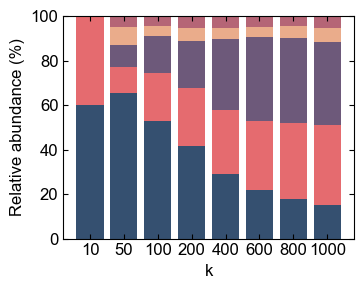

In [18]:
plt.figure(figsize = (3.8, 3.05))
colors = {'Genetic Information Processing': '#355070', 'Metabolism': '#6d597a',
          'Cellular Processes': '#b56576', 'Environmental Information Processing': '#eaac8b',
         'NA': '#e56b6f'}
bottom = np.zeros(df_rclass_high.shape[1])
i = 0
for category, datum in df_rclass_high.iterrows():
    plt.bar([0, 1, 2, 3, 4, 5, 6, 7], datum.values, bottom = bottom, label = category, color = colors[category])
    bottom += datum
    i += 1
# plt.legend(bbox_to_anchor = (0, 1, 1, 0),
#            loc = 'upper left',
#           mode = 'expand', ncol = 2)

plt.xticks([0, 1, 2, 3, 4, 5, 6, 7], ks, rotation = 0)
plt.xlabel('k')
plt.ylabel(f'Relative abundance (%)')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.savefig(f'./figures/figure_3C.svg')
plt.show()

## Mobile Genetic Elements (MGEs) in marker gene sets

To count how many MBEs are contained the set of selected marker, we will use a text description query of the following terms (validate by [Vatanen 2022](https://www.sciencedirect.com/science/article/pii/S0092867422014672#fig3)):

### KEGG

In [19]:
import re

In [20]:
mbes_description = ['antitermination', 'baseplate', 'capsid', 'excisionase', 'DUF4102', 'pf00665', 'KilA-N', 'ORF11CD3', 'phage',
                  'portal', 'tail', 'terminase', 'tape', 'T5orf172', 'viral', 'virion', 'conjugal', 'conjugation', 'conjugative',
                  'DotD', 'IV secretory', 'IV secretion', 'MobA', 'mobilisation', 'mobilization', 'MobL', 'DUF955', 'plasmid',
                  'relaxase', 'TcpE', 'TraG', 'TraL', 'TraM', 'DDE', 'pf01609', 'IS66', 'IstB', 'transposase', 'transposon', 'transposition',
                  'anti-restriction', 'antirestriction', 'integrase', 'integration']

In [21]:
mbes_kos = ['K02238', 'K02242', 'K02243', 'K02244', 'K02245', 'K02246', 'K12296', 'K04096', 'K06198', 'K07343']

In [22]:
len(mbes_kos)

10

Identify the KOs associated with MBEs description

In [23]:
tmp = []
for ko, description in meta.items():
    for mbe_desc in mbes_description:
        if re.search(mbe_desc.lower(), description.lower()):
            print(f'{ko}: {description}; {mbe_desc}')
            tmp.append(ko)

K01000: mraY; phospho-N-acetylmuramoyl-pentapeptide-transferase [EC:2.7.8.13]; tape
K01152: isftu1; isftu1 transposase; transposase
K01551: arsA, ASNA1, GET3; arsenite/tail-anchored protein-transporting ATPase [EC:7.3.2.7 7.3.-.-]; tail
K02334: dpo; DNA polymerase bacteriophage-type [EC:2.7.7.7]; phage
K02563: murG; UDP-N-acetylglucosamine--N-acetylmuramyl-(pentapeptide) pyrophosphoryl-undecaprenol N-acetylglucosamine transferase [EC:2.4.1.227]; tape
K02600: nusA; transcription termination/antitermination protein NusA; antitermination
K02601: nusG; transcription termination/antitermination protein NusG; antitermination
K03194: virB1; type IV secretion system protein VirB1; IV secretion
K03195: virB10, lvhB10; type IV secretion system protein VirB10; IV secretion
K03196: virB11, lvhB11; type IV secretion system protein VirB11 [EC:7.4.2.8]; IV secretion
K03197: virB2, lvhB2; type IV secretion system protein VirB2; IV secretion
K03198: virB3, lvhB3; type IV secretion system protein VirB3;

In [24]:
len(tmp)

135

Manually check and remove KOs from `tmp` that are not relevant.

In [25]:
to_remove = ['K01000', 'K01551', 'K02563', 'K02600', 'K02601', 'K03625', 'K03752', 'K03969', 'K03970', 'K03971', 'K03972', 'K03973', 'K04764', 'K05311',
             'K05788', 'K08691', 'K08777', 'K09011', 'K11954', 'K11955', 'K11956', 'K11957', 'K11958', 'K12349', 'K13818',
             'K14252', 'K14253', 'K18292', 'K18313', 'K18314', 'K19065']

In [26]:
len(to_remove)

31

In [27]:
for ko in to_remove:
    tmp.remove(ko)

In [28]:
len(tmp)

104

In [29]:
mbes_kos.extend(tmp)

In [30]:
len(mbes_kos)

114

In [31]:
len(set(mbes_kos))

107

Check if MBEs are present in selected marker genes

In [32]:
number_mbes = {}
proportion_mbes = {}
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/wol2/marker_genes/kegg/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    mbes = set(genes).intersection(set(mbes_kos)) 
    number_mbes[k] = len(mbes) / len(mbes_kos)
    proportion_mbes[k] = len(mbes) / k
    for mbe in mbes:
        print(f'\t{mbe}: {meta[mbe]}')

At k = 10
	K07497: K07497; putative transposase
At k = 50
	K07497: K07497; putative transposase
At k = 100
	K07497: K07497; putative transposase
	K07483: K07483; transposase
At k = 200
	K07497: K07497; putative transposase
	K07483: K07483; transposase
At k = 400
	K02238: comEC; competence protein ComEC
	K07497: K07497; putative transposase
	K07483: K07483; transposase
	K07486: K07486; transposase
	K04096: smf; DNA processing protein
At k = 600
	K02238: comEC; competence protein ComEC
	K04763: xerD; integrase/recombinase XerD
	K02242: comFC; competence protein ComFC
	K07497: K07497; putative transposase
	K07493: K07493; putative transposase
	K07486: K07486; transposase
	K07483: K07483; transposase
	K04096: smf; DNA processing protein
At k = 800
	K02238: comEC; competence protein ComEC
	K04763: xerD; integrase/recombinase XerD
	K02242: comFC; competence protein ComFC
	K07482: K07482; transposase, IS30 family
	K07497: K07497; putative transposase
	K07494: K07494; putative transposase
	K07

In [33]:
# Proportion of MBEs in markers (k = 1000) with respect to the MBEs in KEGG
14 / len(set(mbes_kos))

0.1308411214953271

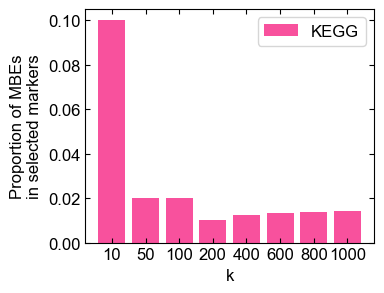

In [34]:
plt.figure(figsize = (4, 3.1))
x = np.arange(len(ks))
plt.bar(x, proportion_mbes.values(), color = '#f72585', label = 'KEGG', alpha = 0.8)
# Proportion of MBEs in KEGG
# plt.axhline(y = 14 / len(set(mbes_kos)), color = 'k', ls = 'dashed')
plt.xticks(x, ks)
plt.xlabel(f'k')
plt.ylabel('Proportion of MBEs\nin selected markers')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.legend()
plt.savefig(f'./figures/figure_S4A_kegg.svg')
plt.show()

### EggNog

In [35]:
mbes_description = ['antitermination', 'baseplate', 'capsid', 'excisionase', 'DUF4102', 'pf00665', 'KilA-N', 'ORF11CD3', 'phage',
                  'portal', 'tail', 'terminase', 'tape', 'T5orf172', 'viral', 'virion', 'conjugal', 'conjugation', 'conjugative',
                  'DotD', 'IV secretory', 'IV secretion', 'MobA', 'mobilisation', 'mobilization', 'MobL', 'DUF955', 'plasmid',
                  'relaxase', 'TcpE', 'TraG', 'TraL', 'TraM', 'DDE', 'pf01609', 'IS66', 'IstB', 'transposase', 'transposon', 'transposition',
                  'anti-restriction', 'antirestriction', 'integrase', 'integration']

In [36]:
mbes_gos = []

Identify the GOs associated with MBEs description

In [37]:
meta_eggnog = {}
with open('./input_data/og_description.txt', 'r') as f:
    for line in f:
        og = line.strip().split('\t')[0]
        description = line.strip().split('\t')[1]
        meta_eggnog[og] = description

In [38]:
tmp = []
for og, description in meta_eggnog.items():
    # Because we use annotations at themost basal level
    if og.startswith('COG') or og.startswith('arCOG'):
        for mbe_desc in mbes_description:
            if re.search(mbe_desc, description):
                print(f'{og}: {description}; {mbe_desc}')
                tmp.append(og)

COG0051: transcription antitermination factor activity, RNA binding; antitermination
COG0195: Participates in both transcription termination and antitermination; antitermination
COG0250: Participates in transcription elongation, termination and antitermination; antitermination
COG0582: viral genome integration into host DNA; viral
COG0582: viral genome integration into host DNA; integration
COG0630: type IV secretory pathway, VirB11 components, and related ATPases involved in Archaeal flagella biosynthesis; IV secretory
COG0707: Cell wall formation. Catalyzes the transfer of a GlcNAc subunit on undecaprenyl-pyrophosphoryl-MurNAc-pentapeptide (lipid intermediate I) to form undecaprenyl-pyrophosphoryl-MurNAc- (pentapeptide)GlcNAc (lipid intermediate II); tape
COG0781: Involved in transcription antitermination. Required for transcription of ribosomal RNA (rRNA) genes. Binds specifically to the boxA antiterminator sequence of the ribosomal RNA (rrn) operons; antitermination
COG1340: protei

In [39]:
total_mbes_ogs = tmp

In [40]:
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/wol2/marker_genes/eggnog/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    for go in genes:
        for mbe_desc in mbes_description: 
            if re.search(mbe_desc.lower(), meta_eggnog[go].lower()):
                print(f'\t{go}: {meta_eggnog[go]}; {mbe_desc}')    

At k = 10
	COG0244: Forms part of the ribosomal stalk, playing a central role in the interaction of the ribosome with GTP-bound translation factors; TraL
	COG2963: transposase activity; transposase
At k = 50
	COG0051: transcription antitermination factor activity, RNA binding; antitermination
	COG0195: Participates in both transcription termination and antitermination; antitermination
	COG0094: This is 1 of the proteins that binds and probably mediates the attachment of the 5S RNA into the large ribosomal subunit, where it forms part of the central protuberance. In the 70S ribosome it contacts protein S13 of the 30S subunit (bridge B1b), connecting the 2 subunits; TraL
	COG0096: One of the primary rRNA binding proteins, it binds directly to 16S rRNA central domain where it helps coordinate assembly of the platform of the 30S subunit; TraL
	COG2801: Transposase and inactivated derivatives; transposase
	COG0244: Forms part of the ribosomal stalk, playing a central role in the interaction

Manually check whether the hits actually correcpond to MBEs

In [41]:
tmp = ['COG2963', 'COG2801', 'COG2963', 'COG2801', 'COG2963', 'COG2801', 'COG2963', 'COG4974', 
      'COG2801', 'COG2963', 'COG0582', 'COG3547', 'COG4974', 'COG2801', 'COG2963',
      'COG3039', 'COG0582', 'COG3547', 'COG4974', 'COG2963', 'COG3039', 'COG0582', 'COG3328',
      'COG3547', 'COG3677', 'COG1943', 'COG4974', 'COG2963', 'COG3039', 'COG0582', 'COG3293',
      'COG3328', 'COG3335', 'COG3385', 'COG3547']

In [42]:
mbes_ogs = set(tmp)

In [43]:
len(mbes_ogs)

12

Add also KO mentioned in [Vatanen 2022](https://www.sciencedirect.com/science/article/pii/S0092867422014672#fig3). Take COGs associated to each entry according to KEGG

In [44]:
mbes_ogs.update(['COG0658', 'COG2333', 'COG1040', 'COG2804', 'COG1459', 'COG4537', 'COG2165', 
             'COG0758', 'COG4469', 'COG3070'])

In [45]:
len(mbes_ogs)

22

In [46]:
total_mbes_ogs.extend(['COG0658', 'COG2333', 'COG1040', 'COG2804', 'COG1459', 'COG4537', 'COG2165', 
             'COG0758', 'COG4469', 'COG3070'])

In [47]:
len(set(total_mbes_ogs))

179

In [48]:
proportion_mbes_eggnog = {}
ks = [10, 50, 100, 200, 400, 600, 800, 1000]
for k in ks:
    print(f'At k = {k}')
    genes = np.loadtxt(f'./output_data/wol2/marker_genes/eggnog/bit_score_threshold_1.0/k_{k}_p_0/all_genes.txt',
                   dtype = str)
    mbes = set(genes).intersection(mbes_ogs) 
    proportion_mbes_eggnog[k] = len(mbes) / k
    for mbe in mbes:
        print(f'\t{mbe}: {meta_eggnog[mbe]}')

At k = 10
	COG2963: transposase activity
At k = 50
	COG2963: transposase activity
	COG2801: Transposase and inactivated derivatives
At k = 100
	COG2963: transposase activity
	COG2801: Transposase and inactivated derivatives
At k = 200
	COG2963: transposase activity
	COG2801: Transposase and inactivated derivatives
At k = 400
	COG1040: competence protein
	COG3547: Transposase (IS116 IS110 IS902 family)
	COG0582: viral genome integration into host DNA
	COG2963: transposase activity
	COG0758: DNA mediated transformation
	COG0658: competence protein
	COG4974: Belongs to the 'phage' integrase family
	COG2801: Transposase and inactivated derivatives
At k = 600
	COG3039: Transposase
	COG1040: competence protein
	COG3547: Transposase (IS116 IS110 IS902 family)
	COG0582: viral genome integration into host DNA
	COG2963: transposase activity
	COG0758: DNA mediated transformation
	COG0658: competence protein
	COG4974: Belongs to the 'phage' integrase family
	COG2801: Transposase and inactivated de

In [49]:
# Proportion of MBEs in markers (k = 1000) with respect to the MBEs in EggNog
15 / len(total_mbes_ogs)

0.06912442396313365

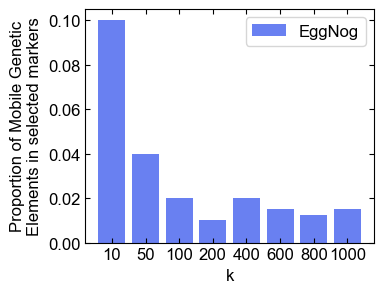

In [50]:
plt.figure(figsize = (4, 3.1))
x = np.arange(len(ks))
plt.bar(x, proportion_mbes_eggnog.values(), color = '#4361ee', label = 'EggNog', alpha = 0.8)
# Proportion of MBEs in KEGG
# plt.axhline(y = 15 / len(total_mbes_ogs), color = 'k', ls = 'dashed')
plt.xticks(x, ks)
plt.xlabel(f'k')
plt.ylabel('Proportion of Mobile Genetic\nElements in selected markers')
plt.tick_params(top = True, right = True, direction = 'in', which = 'both')
plt.legend()
plt.savefig(f'./figures/figure_S4A_eggnog.svg')
plt.show()

Save EggNog descriptions of markers

In [51]:
k = 1000
markers = np.loadtxt(f'./output_data/wol2/marker_genes/eggnog/bit_score_threshold_1.0/k_100_p_0/all_genes.txt',
                   dtype = str)
with open(f'./output_data/wol2/marker_genes/eggnog/table_S1_eggnog.tsv', 'w') as f:
    f.write(f'Marker\tDescription\n')
    for marker in markers:
        f.write(f'{marker}\t{meta_eggnog[marker]}\n')